In [4]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [2]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/pyr_int_df.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]
# data = data[data$n_cells > 1,]

# To be consistent with participation_prob, we restrict to sessions with >= 50 ripples
data = data[data$n_ripples >= 50,]
data = data[data$n_spikes >= 100,]



data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X          Unnamed..0                      session        tetrode    
 Min.   :  75   Min.   :  75   LEM3124_S20190302163218: 134   TT4.mat: 582  
 1st Qu.:2034   1st Qu.:2034   LEM3206_S20190719140644: 119   TT1.mat: 581  
 Median :3917   Median :3917   LEM3206_S20190718143924: 118   TT6.mat: 555  
 Mean   :3857   Mean   :3857   LEM3206_S20190717140525: 117   TT7.mat: 527  
 3rd Qu.:5887   3rd Qu.:5887   LEM3206_S20190720132154: 113   TT3.mat: 460  
 Max.   :8225   Max.   :8225   LEM3216_S20190718101925: 113   TT2.mat: 449  
                               (Other)                :3903   (Other):1463  
      cell        acg_tau_decay      acg_tau_rise         acg_c         
 Min.   :  0.00   Min.   :  1.000   Min.   : 0.1000   Min.   :  0.0868  
 1st Qu.:  3.00   1st Qu.:  8.766   1st Qu.: 0.7589   1st Qu.: 10.2524  
 Median :  6.00   Median : 17.568   Median : 1.5602   Median : 20.1631  
 Mean   : 23.79   Mean   : 53.078   Mean   : 3.3075   Mean   : 30.5431  
 3rd Qu.: 11.00   3

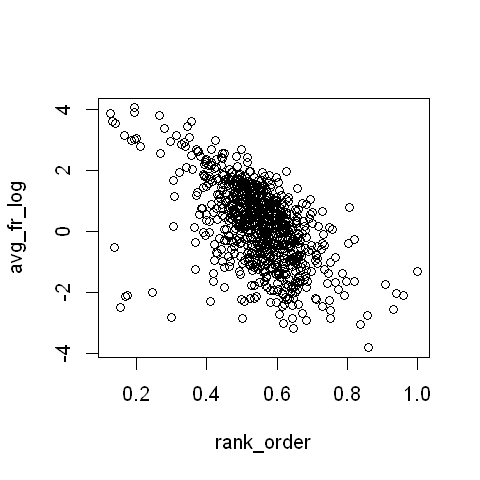

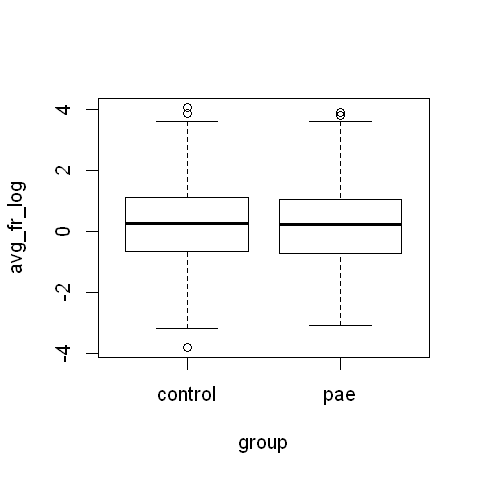

In [15]:
plot(avg_fr_log ~ rank_order * group,data=data[data$area == "ca1" & data$cell_type=='pyr',])

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: avg_fr_log ~ rank_order * group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  2288.1   2316.2  -1138.0   2276.1      789 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3034 -0.5681  0.0918  0.6704  2.8044 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 0.1032   0.3212  
 Residual             0.9860   0.9930  
Number of obs: 795, groups:  session, 27

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           5.1417     0.2921 369.8478  17.604  < 2e-16 ***
rank_order           -8.8130     0.4733 789.2286 -18.620  < 2e-16 ***
grouppae             -2.4680     0.3970 425.3705  -6.216 1.22e-09 ***
rank_order:grouppae   4.2302     0.6552 792.4202   6.457 1.86e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0

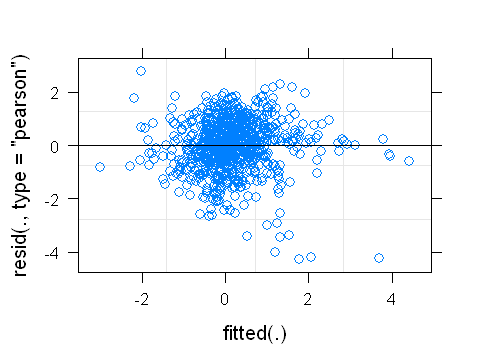

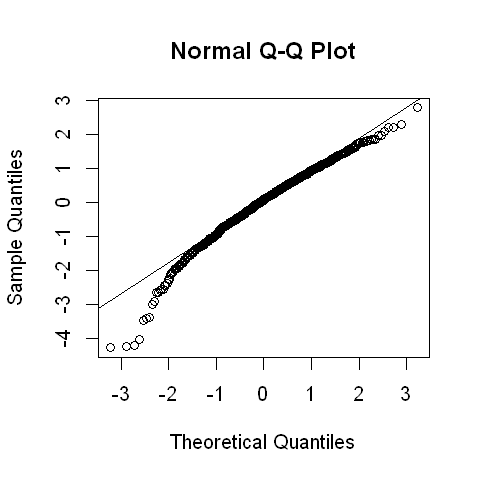

In [17]:
data$avg_fr_log <- log(data$avg_fr)

m1 = lmer(avg_fr_log ~ rank_order * group + (1 | session), data = data[data$area == "ca1" & data$cell_type=='pyr',],REML=FALSE)
 
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [21]:
coef(m1)

$session
                        (Intercept) rank_order  grouppae rank_order:grouppae
LEM3116_S20180717110938    4.565581  -8.812963 -2.467998            4.230224
LEM3116_S20180718184628    5.512517  -8.812963 -2.467998            4.230224
LEM3120_S20181007151036    5.096851  -8.812963 -2.467998            4.230224
LEM3124_S20190226101957    5.275198  -8.812963 -2.467998            4.230224
LEM3124_S20190301133246    5.290112  -8.812963 -2.467998            4.230224
LEM3124_S20190302163218    4.913672  -8.812963 -2.467998            4.230224
LEM3124_S20190305105641    4.593907  -8.812963 -2.467998            4.230224
LEM3124_S20190307163732    4.921304  -8.812963 -2.467998            4.230224
LEM3124_S20190309145324    5.034977  -8.812963 -2.467998            4.230224
LEM3124_S20190315160017    5.249360  -8.812963 -2.467998            4.230224
LEM3124_S20190319154019    5.122997  -8.812963 -2.467998            4.230224
LEM3124_S20190322123145    4.969918  -8.812963 -2.467998           

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: avg_fr_log ~ rank_order * group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
   992.3   1014.9   -490.1    980.3      318 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5034 -0.6500  0.0771  0.6441  2.3670 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 0.183    0.4277  
 Residual             1.121    1.0587  
Number of obs: 324, groups:  session, 25

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           5.2565     0.4805 257.0874  10.939  < 2e-16 ***
rank_order           -8.8587     0.8081 317.3293 -10.962  < 2e-16 ***
grouppae             -3.2797     0.5974 251.3054  -5.490 9.82e-08 ***
rank_order:grouppae   5.5541     1.0056 317.7804   5.523 6.93e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0

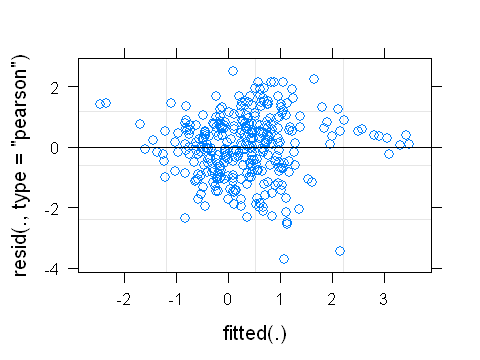

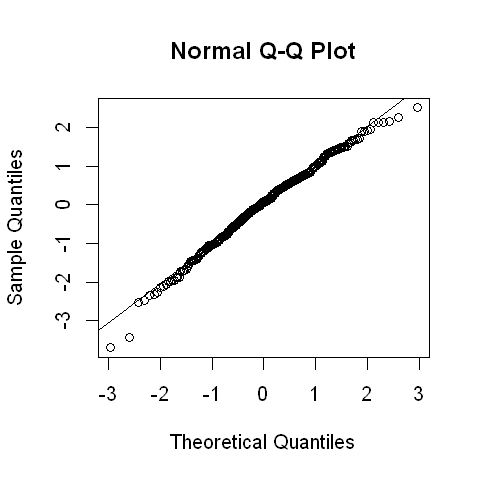

In [25]:
data$avg_fr_log <- log(data$avg_fr)

m1 = lmer(avg_fr_log ~ rank_order * group + (1 | session), data = data[data$area == "ca1" & data$cell_type=='int',],REML=FALSE)
 
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: avg_fr_log_trans ~ rank_order * group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  9503.2   9543.7  -4744.6   9489.2     2384 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5640 -0.6323  0.1166  0.7187  2.5035 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3594   0.5995  
 rat         (Intercept) 0.6412   0.8008  
 Residual                2.9442   1.7159  
Number of obs: 2391, groups:  session:rat, 68; rat, 6

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           12.3695     0.5703   11.0082  21.690 2.21e-10 ***
rank_order            -9.0349     0.4613 2342.0179 -19.585  < 2e-16 ***
grouppae              -0.9156     0.7710    9.5433  -1.188   0.2637    
rank_order:grouppae    1.26

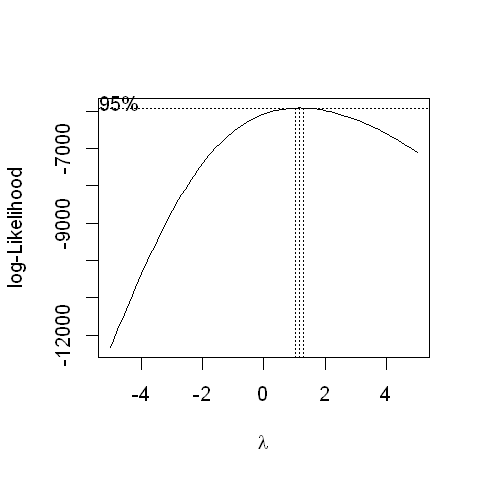

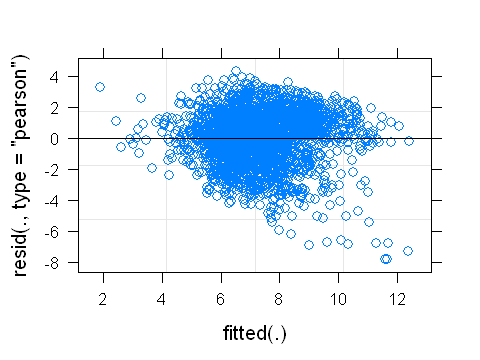

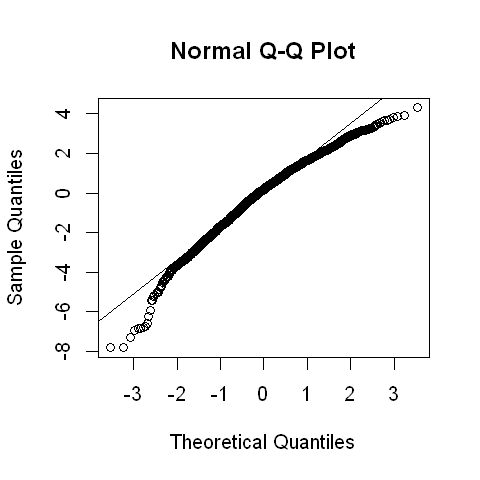

In [39]:
data$avg_fr_log <- log(data$avg_fr)
data$avg_fr_log <- data$avg_fr_log+5

m1 = lm(avg_fr_log ~ rank_order * group, data = data[data$cell_type == "pyr" & data$area == "ca3",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$avg_fr_log_trans = data$avg_fr_log^lambda

m1 = lmer(avg_fr_log_trans ~ rank_order * group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',],REML=FALSE)
 
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: avg_fr_log_trans ~ rank_order * group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  4217.0   4251.6  -2101.5   4203.0     1040 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5303 -0.6239  0.0839  0.7380  2.2466 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.4584   0.6771  
 rat         (Intercept) 0.6569   0.8105  
 Residual                2.9897   1.7291  
Number of obs: 1047, groups:  session:rat, 63; rat, 6

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           13.4161     0.8063   30.0870  16.639   <2e-16 ***
rank_order            -9.7371     1.0995 1037.9776  -8.856   <2e-16 ***
grouppae              -0.9124     0.9740   16.6379  -0.937    0.362    
rank_order:grouppae    0.48

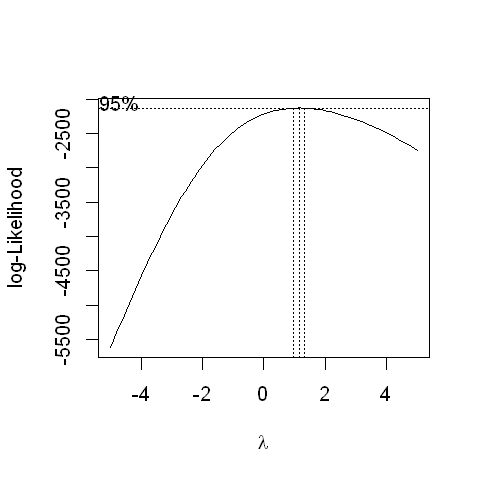

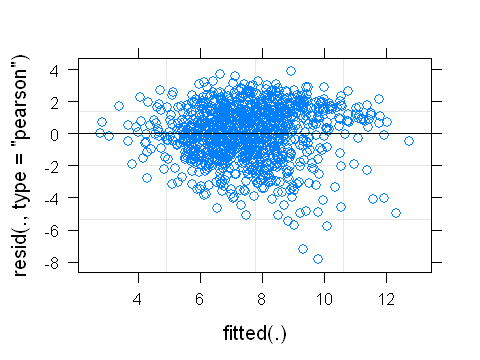

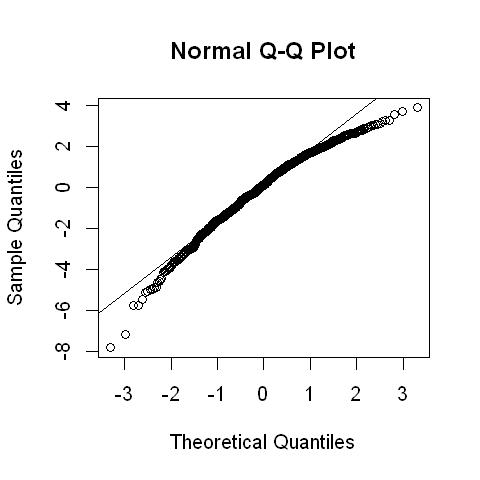

In [41]:
data$avg_fr_log <- log(data$avg_fr)
data$avg_fr_log <- data$avg_fr_log+5

m1 = lm(avg_fr_log ~ rank_order * group, data = data[data$cell_type == "int" & data$area == "ca3",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$avg_fr_log_trans = data$avg_fr_log^lambda


m1 = lmer(avg_fr_log_trans ~ rank_order * group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',],REML=FALSE)
 
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))